In [ ]:
#https://github.com/AaronWard/covidify/blob/master/notebooks/data_exploration.ipynb

In [10]:
!pip install pyarrow
!pip install datetime

In [11]:
### from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

#set ggplot style
plt.style.use('ggplot')

In [12]:
# Dynamic parameters
data_dir  = '../Datasets/' 
agg_file  = 'agg_data_2020-04-08.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'data_UK.csv'.format(datetime.date(datetime.now()))

COUNTRY = 'Uk'


print(trend_file)

# import data
agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file))

# daily_df.new_confirmed_cases = daily_df.new_confirmed_cases.abs()

#Create place to save diagrams
image_dir = '../Imagens/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

data_UK.csv


In [13]:
# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    agg_df[col] = agg_df[col].replace('', 0).astype(int)

In [14]:
def create_title(fig_title, country):
    if country:
        return fig_title + ' for ' + country
    else:
        return fig_title
    
def create_save_file(col, country, graph_type):
    if country:
        return '{}_{}_{}.png'.format(country, col, graph_type)
    else:
        return '{}_{}.png'.format(col, graph_type)

In [15]:
# Plot and save trendline graph
def create_trend_line(tmp_df, col, col2, col3, fig_title, country):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[[col, col2, col3]].sum().plot(ax=ax, marker='o')
    ax.set_title(create_title(fig_title, country))
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'trendline')))
    
def create_bar(tmp_df, col, rgb, country):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp = tmp_df.head(30).groupby(['date'])[[col]].sum()
    ax.set_title(create_title(col, country))
    tmp.plot.bar(ax=ax, rot=45, color=rgb)
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'bar')))
    
    
def create_stacked_bar(tmp_df, col1, col2, fig_title, country):
    tmp_df = tmp_df.set_index('date')
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_title(create_title(fig_title, country))
    tmp_df[[col2, col1]].plot.bar(ax=ax,
                                  rot=45,
                                  stacked=True);
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col2, country, 'stacked_bar')))

Creating graphs...
... Time Series Trend Line


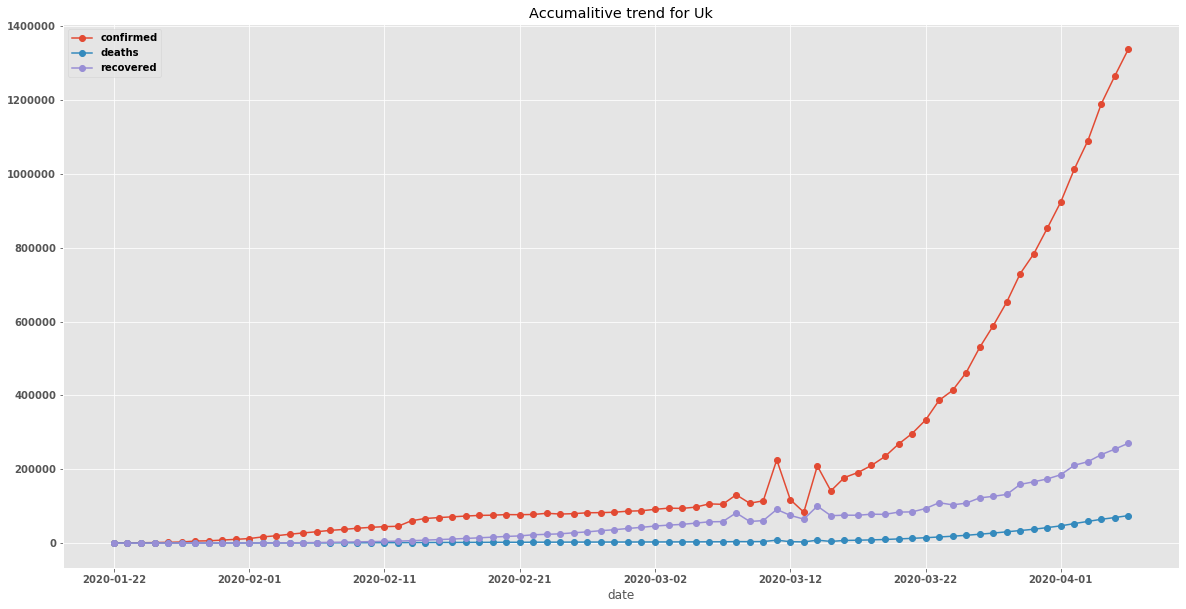

In [16]:
##### Create Graphs #####
    
print('Creating graphs...')
print('... Time Series Trend Line')
# Time Series Data Plots
create_trend_line(agg_df, 'confirmed', 'deaths', 'recovered', 'Accumalitive trend', COUNTRY)

... Daily Figures
... Daily New Infections Differences


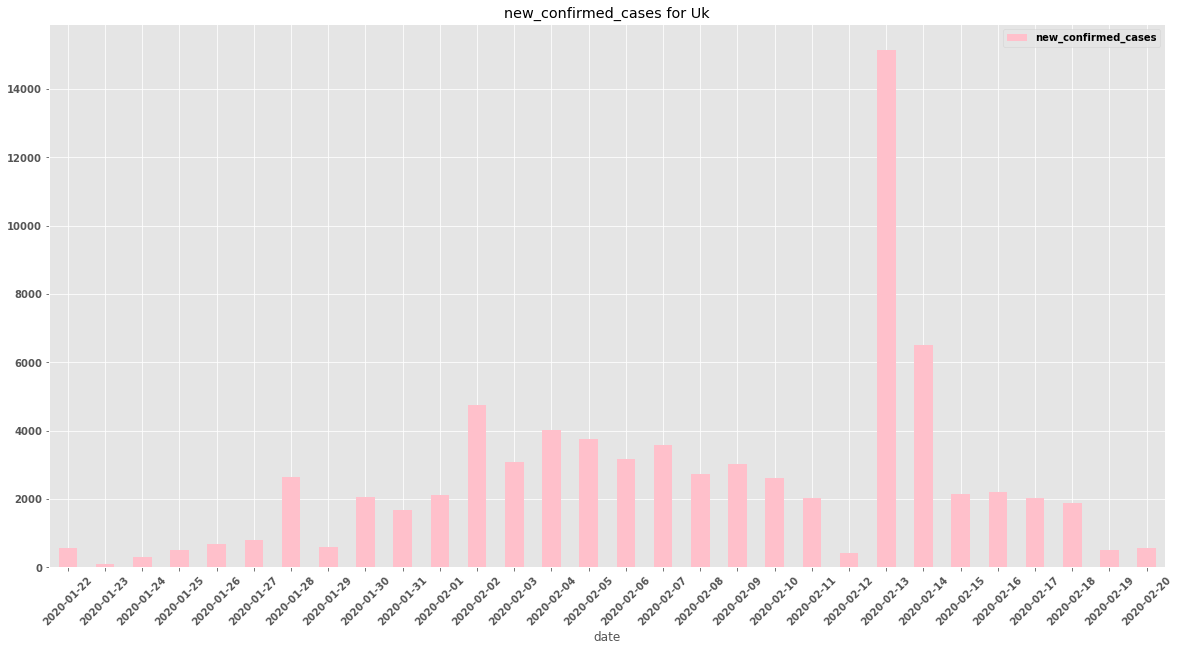

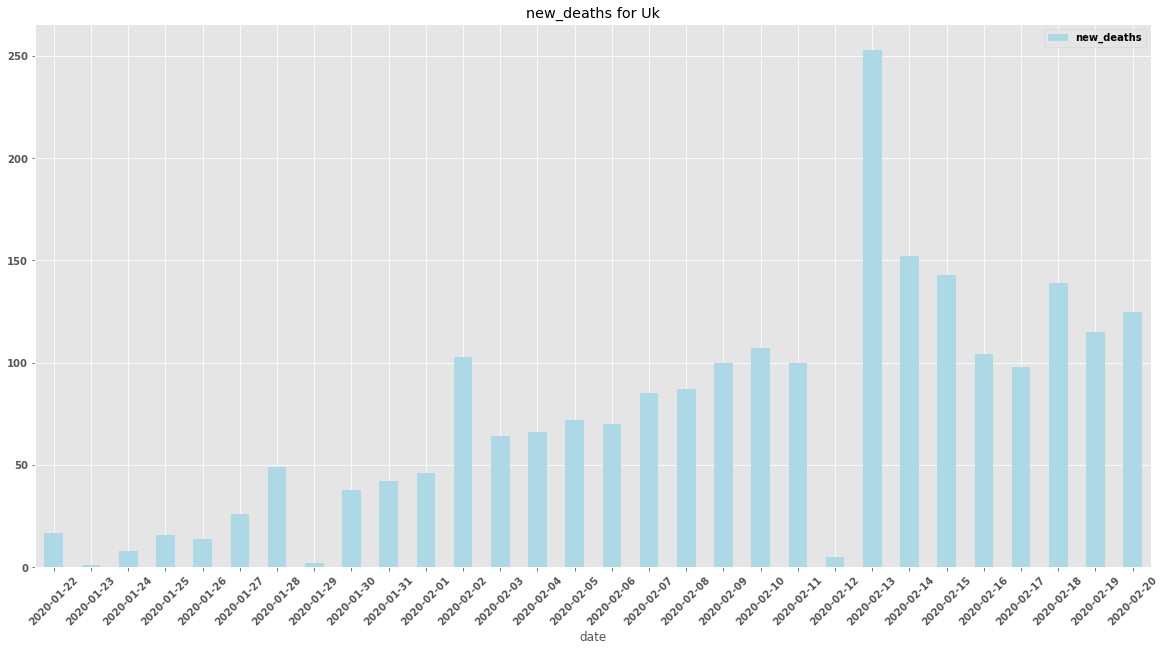

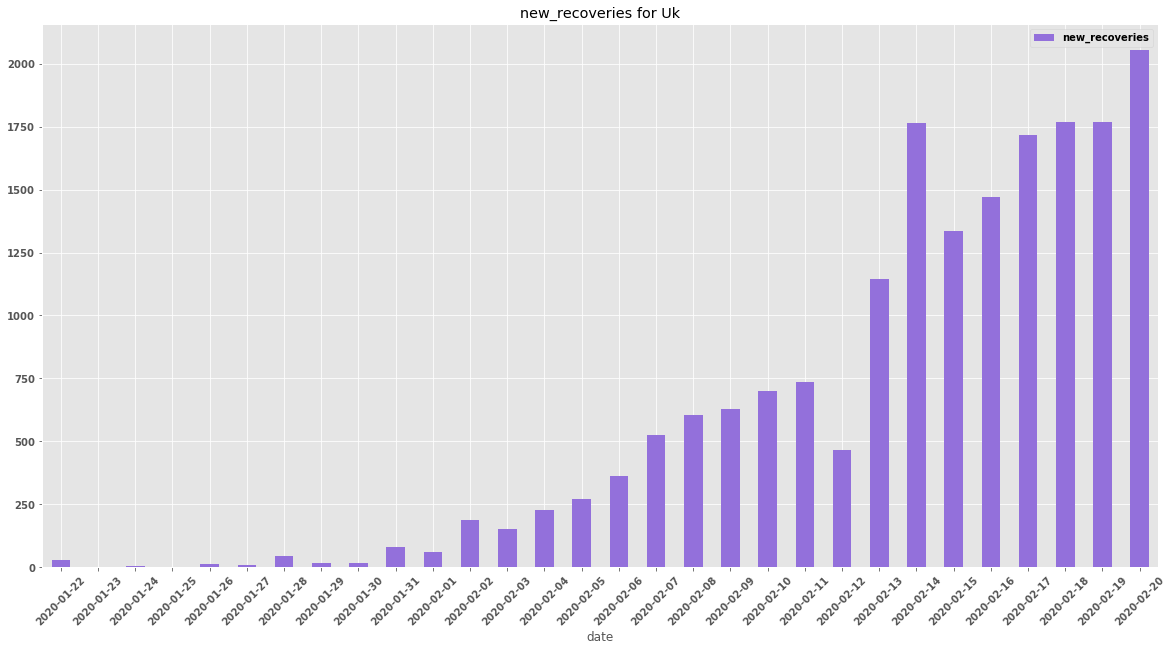

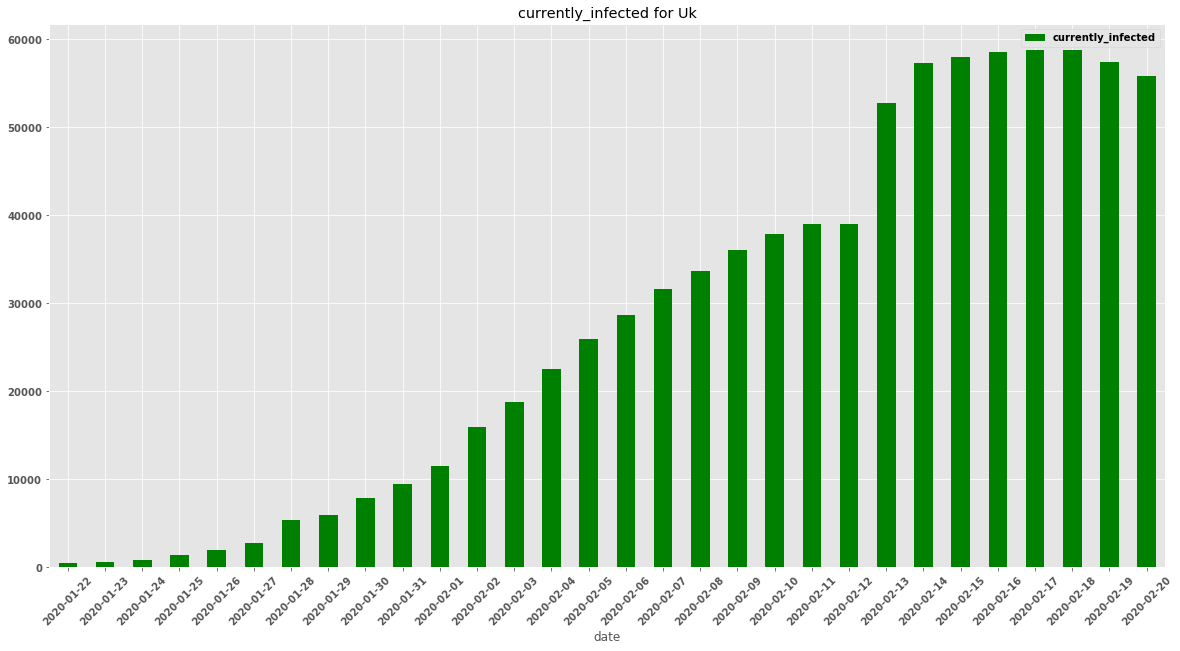

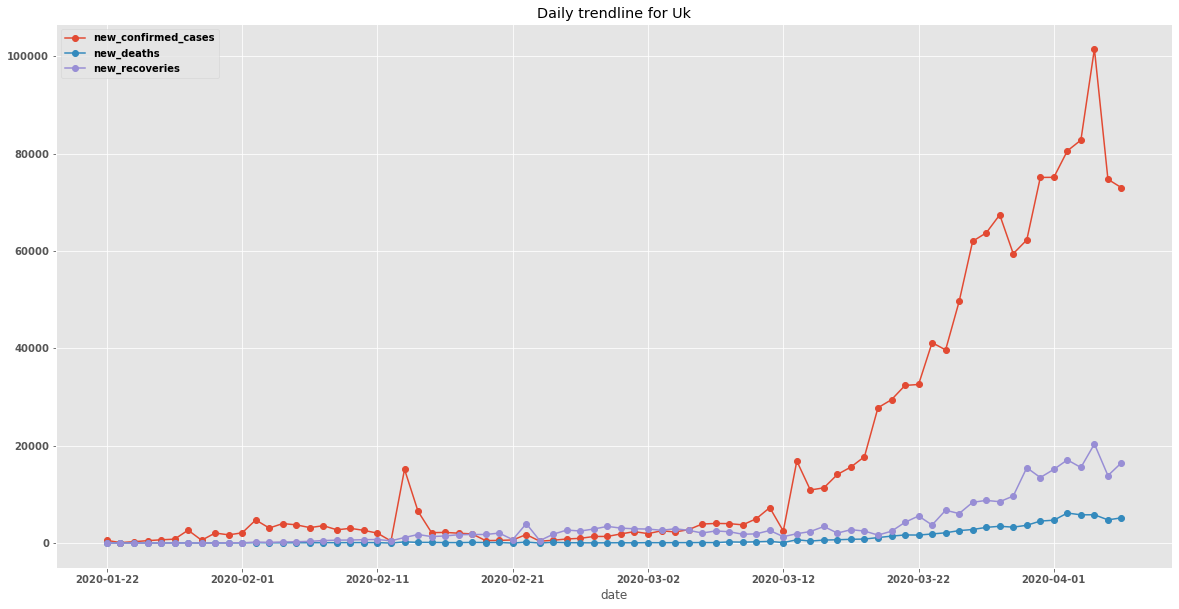

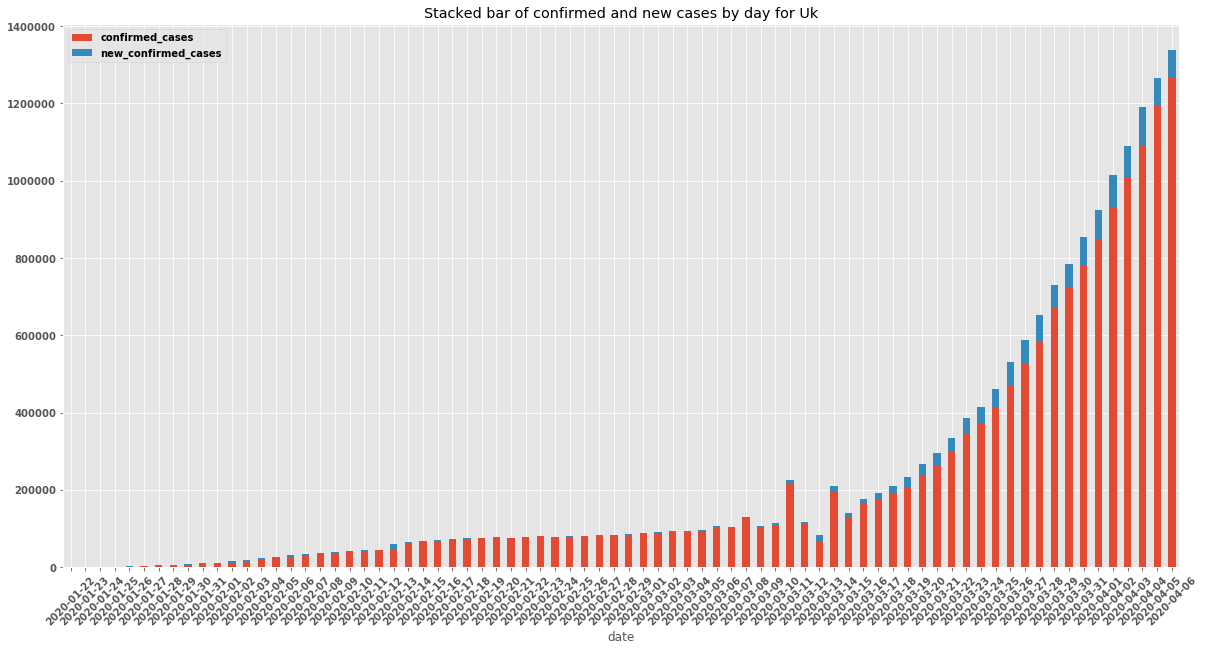

In [22]:
print('... Daily Figures')
# Daily Figures Data Plots
daily_figures_cols = ['new_confirmed_cases', 'new_deaths', 'new_recoveries', 'currently_infected']
for col, rgb in zip (daily_figures_cols, ['pink', 'lightblue', 'mediumpurple', 'green']):
    create_bar(daily_df, col, rgb, COUNTRY)    
    
# Trend line for new cases
create_trend_line(daily_df, 'new_confirmed_cases', 'new_deaths', 'new_recoveries', 'Daily trendline', COUNTRY)
    
    
print('... Daily New Infections Differences')
new_df = pd.DataFrame([])
new_df['date'] = daily_df['date']
new_df['confirmed_cases'] = agg_df.groupby(['date']).confirmed.sum().values - daily_df.new_confirmed_cases
new_df['new_confirmed_cases'] = daily_df.new_confirmed_cases
create_stacked_bar(new_df, 'new_confirmed_cases', 'confirmed_cases', "Stacked bar of confirmed and new cases by day", COUNTRY)

In [18]:
daily_df

,Unnamed: 0,day,date,new_confirmed_cases,new_deaths,new_recoveries,cumulative_cases,currently_infected,delta
0,0,0,2020-01-22,555,17,28,555,510,-45
1,1,1,2020-01-23,98,1,2,653,605,-48
2,2,2,2020-01-24,288,8,6,941,879,-62
3,3,3,2020-01-25,497,16,3,1438,1357,-81
4,4,4,2020-01-26,680,14,13,2118,2010,-108
...,...,...,...,...,...,...,...,...,...
71,71,71,2020-04-02,80552,6174,17086,1013157,749911,-263246
72,72,72,2020-04-03,82760,5804,15533,1095917,811334,-284583
73,73,73,2020-04-04,101488,5819,20356,1197405,886647,-310758
74,74,74,2020-04-05,74710,4768,13860,1272115,942729,-329386
